<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


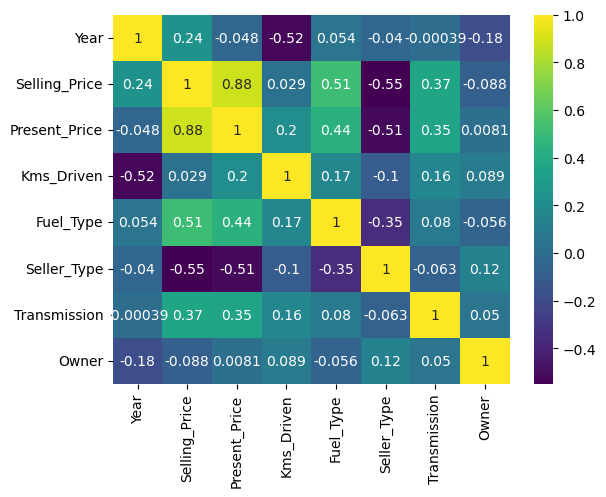

Support Vector Machine Accuracy Score:  0.6065573770491803


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Loading the data
car_data = pd.read_csv('data/cardata.csv')
car_data.head()
car_data.info()

# Encoding Columns
car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# Discretize Selling_Price into two categories: low price (0) and high price (1)
car_data['Price_Category'] = pd.cut(car_data['Selling_Price'], bins=[-float('inf'), 5, float('inf')], labels=[0, 1])

corrMatrix = car_data.corr()
sns.heatmap(corrMatrix, annot=True, cmap="viridis")
plt.show()

X = car_data.drop(['Car_Name', 'Selling_Price', 'Price_Category'], axis=1)
Y = car_data['Price_Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = metrics.accuracy_score(Y_test, svm_pred)
print("Support Vector Machine Accuracy Score: ", svm_accuracy)
